In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import time

# Problem 1
## Dataset Generation

Write a function to **generate a training set** of size $m$
- randomly generate a weight vector $w \in \mathbb{R}^{10}$, normalize length
- generate a training set $\{(x_i , y_i)\}$ of size m
  - $x_i$: random vector in $\mathbb{R}^{10}$ from $\textbf{N}(0, I)$
  - $y_i$: $\{0, +1\}$ with $P[y = +1] = \sigma(w \cdot x_i)$ and $P[y = 0] = 1 - \sigma(w \cdot x_i)$

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def generate_data(m):
    # returns the true w as well as X, Y data
    # Generate the weight vector w* with each element from N(0, 1)
    w_star = np.random.randn(10)
    # Normalize w_star
    w_star /= np.linalg.norm(w_star)

    # Prepare the dataset
    X = np.random.randn(m, 10)  # Generate m samples of x_i
    Y = np.zeros(m, dtype=int)

    for i in range(m):
        # Compute the dot product
        dot_product = np.dot(w_star, X[i])
        # Generate label using the sigmoid function and a random threshold
        if np.random.uniform(0, 1) < sigmoid(dot_product):
            Y[i] = 1
        else:
            Y[i] = 0

    return w_star, X, Y


## Algorithm 1: logistic regression

The goal is to learn $w$.  Algorithm 1 is logistic
  regression (you may use the built-in method LogisticRegression for this. Use max_iter=1000).

In [ ]:
def logistic_regression(X, Y):
    # Create the Logistic Regression model with a high iteration limit
    model = LogisticRegression(max_iter=1000)
    model.fit(X, Y)
    return model.coef_.ravel()

# Generate the data
w_star, X_data, Y_labels = generate_data(1000)  # We can adjust the number of samples



print("True Weight Vector:", w_star)
print("Learned Weight Vector:", logistic_regression(X_data, Y_labels))



True Weight Vector: [-0.25587493 -0.14320772 -0.18571174 -0.21042477 -0.09970928  0.61763446
  0.61909822  0.06794793 -0.19912934  0.12761602]
Learned Weight Vector: [-0.1912691  -0.14279389 -0.18652509 -0.18928576 -0.0931641   0.55657146
  0.58892228  0.02448017 -0.22557212  0.08211096]


## Algorithm 2: gradient descent with square loss

Define square loss as
$$L_i(w^{(t)}) = \frac{1}{2} \left( \sigma(w^{(t)} \cdot x) - y_i \right)^2$$

  Algorithm 2 is
  gradient descent with respect to square loss (code this
  up yourself -- run for 1000 iterations, use step size eta = 0.01).

In [ ]:
def square_loss_gradient(w, x, y):
    # Predicted probability using the sigmoid function
    y_pred = sigmoid(np.dot(w, x))
    # Compute the error
    error = y_pred - y
    # Gradient of the loss with respect to the prediction
    grad_pred = error * y_pred * (1 - y_pred)
    # Chain rule to get the gradient of the loss with respect to w
    grad_w = grad_pred * x
    return grad_w

def gradient_descent(X, Y, learning_rate=0.01, iterations=1000):
    # Initialize weights randomly
    w = np.random.randn(10)
    # Perform gradient descent
    for i in range(iterations):
        grad = np.zeros(10)
        # Accumulate gradients over all samples
        for x, y in zip(X, Y):
            grad += square_loss_gradient(w, x, y)
        # Average the gradients
        grad /= len(Y)
        # Update weights
        w -= learning_rate * grad
    return w

# Example usage with the generated data
w_star, X_data, Y_labels = generate_data(1000)  # Use the previously defined function to generate data
learned_w = gradient_descent(X_data, Y_labels)

print("True Weight Vector:", w_star)
print("Learned Weight Vector by Gradient Descent:", learned_w)

True Weight Vector: [-0.19474974  0.06872707  0.38353965  0.34319817  0.01251285  0.09730117
 -0.16946033  0.53372421 -0.46412584  0.39223241]
Learned Weight Vector by Gradient Descent: [ 0.27712873 -0.49151851  0.06378141  1.22649583 -1.06653307 -0.60799943
 -1.17281543  1.34493987 -2.50066846  1.48684921]


## Algorithm 3: stochastic gradient descent with square loss
Similar to gradient descent, except we use the gradient at a single random training point every iteration.

In [ ]:
def stochastic_gradient_descent(X, Y, learning_rate=0.01, iterations=1000):
    n_samples = len(Y)
    # Initialize weights randomly
    w = np.random.randn(10)
    # Perform SGD
    for i in range(iterations):
        # Randomly pick one data point
        idx = np.random.randint(n_samples)
        x = X[idx]
        y = Y[idx]
        # Compute gradient for this single point
        grad = square_loss_gradient(w, x, y)
        # Update weights
        w -= learning_rate * grad
    return w

# Example usage with the generated data
w_star, X_data, Y_labels = generate_data(1000)  # Use the previously defined function to generate data
learned_w_sgd = stochastic_gradient_descent(X_data, Y_labels)

print("True Weight Vector:", w_star)
print("Learned Weight Vector by SGD:", learned_w_sgd)

True Weight Vector: [-0.29153301  0.05460113 -0.39783539 -0.00110764 -0.19557531 -0.58998236
  0.09751386  0.5222781   0.25759034 -0.13706916]
Learned Weight Vector by SGD: [-0.85991855  1.49009853  0.72176617  0.82981576 -0.27145855  1.96489264
  0.63255445  0.39363247  0.98278017  0.85759157]


## Evaluation

Measure error $\|w - \hat{w}\|_2$ for each method at different sample size. For any
  fixed value of $m$, choose many different $w$'s and average the
  values $\|w -
  \hat{w}\|_2$ for Algorithms 1, 2 and 3.  Plot the results
  for for each algorithm as you make $m$ large (use $m=50, 100, 150, 200, 250$).
  Also record, for each algorithm, the time taken to run the overall experiment.

Logistic Regression at m=50: Error = 1.1760, Time = 0.0030 seconds
Gradient Descent at m=50: Error = 3.0720, Time = 0.3826 seconds
SGD at m=50: Error = 3.1041, Time = 0.0191 seconds
Logistic Regression at m=100: Error = 0.7372, Time = 0.0033 seconds
Gradient Descent at m=100: Error = 2.9762, Time = 0.8189 seconds
SGD at m=100: Error = 3.6138, Time = 0.0114 seconds
Logistic Regression at m=150: Error = 0.5624, Time = 0.0026 seconds
Gradient Descent at m=150: Error = 3.1879, Time = 1.1102 seconds
SGD at m=150: Error = 3.2746, Time = 0.0126 seconds
Logistic Regression at m=200: Error = 0.4504, Time = 0.0030 seconds
Gradient Descent at m=200: Error = 3.2753, Time = 1.8527 seconds
SGD at m=200: Error = 3.1961, Time = 0.0374 seconds
Logistic Regression at m=250: Error = 0.4129, Time = 0.0129 seconds
Gradient Descent at m=250: Error = 2.7814, Time = 1.9280 seconds
SGD at m=250: Error = 3.0230, Time = 0.0131 seconds


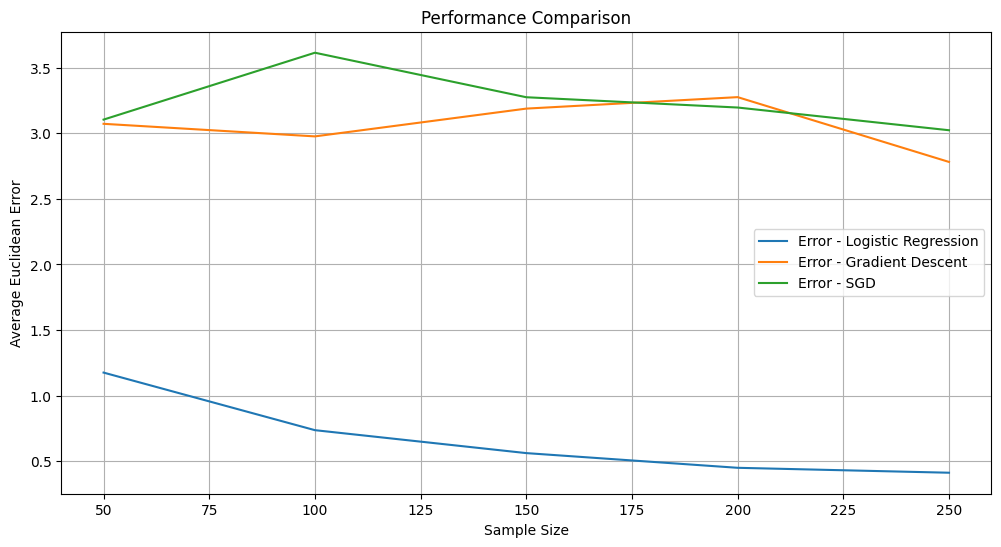

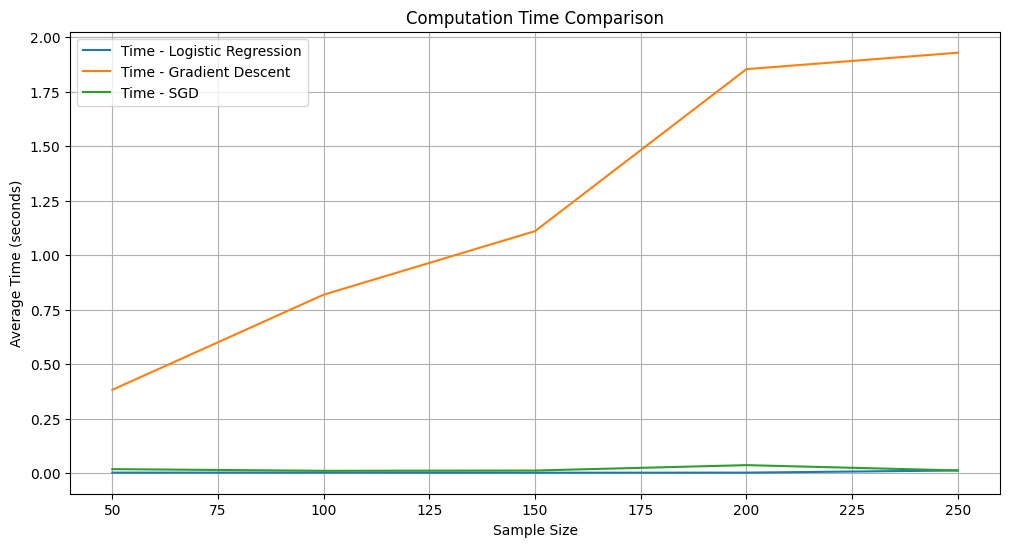

In [ ]:
sample_sizes = [50, 100, 150, 200, 250]
repeats = 10
algorithms = {'Logistic Regression': logistic_regression,
              'Gradient Descent': gradient_descent,
              'SGD': stochastic_gradient_descent}
results = {alg: [] for alg in algorithms}
times = {alg: [] for alg in algorithms}

# Evaluate algorithms
for m in sample_sizes:
    for alg_name, alg_func in algorithms.items():
        errors = []
        total_time = 0
        for _ in range(repeats):
            w_star, X, Y = generate_data(m)
            start_time = time.time()
            w_hat = alg_func(X, Y)
            total_time += time.time() - start_time
            errors.append(np.linalg.norm(w_star - w_hat))
        avg_error = np.mean(errors)
        avg_time = total_time / repeats
        results[alg_name].append(avg_error)
        times[alg_name].append(avg_time)
        print(f"{alg_name} at m={m}: Error = {avg_error:.4f}, Time = {avg_time:.4f} seconds")

# Plotting results
plt.figure(figsize=(12, 6))
for alg_name in algorithms:
    plt.plot(sample_sizes, results[alg_name], label=f'Error - {alg_name}')
plt.xlabel('Sample Size')
plt.ylabel('Average Euclidean Error')
plt.title('Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
for alg_name in algorithms:
    plt.plot(sample_sizes, times[alg_name], label=f'Time - {alg_name}')
plt.xlabel('Sample Size')
plt.ylabel('Average Time (seconds)')
plt.title('Computation Time Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Problem 2

In [ ]:
#from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#cancer = datasets.load_breast_cancer()
# Load data
data = load_breast_cancer()
X, y = data.data, data.target

For each depth in $1, \dots, 5$, instantiate an AdaBoost classifier with the base learner set to be a decision tree of that depth (set `n_estimators=10` and `learning_rate=1`), and then record the 10-fold cross-validated error on the entire breast cancer data set. Plot the resulting curve of accuracy against base classifier depth. Use $101$ as your random state for both the base learner as well as the AdaBoost classifier every time.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Depth 1: Mean CV Accuracy = 0.9455200501253133


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Depth 2: Mean CV Accuracy = 0.9402568922305765


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Depth 3: Mean CV Accuracy = 0.9384398496240604


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Depth 4: Mean CV Accuracy = 0.9613721804511277


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Depth 5: Mean CV Accuracy = 0.9473057644110275


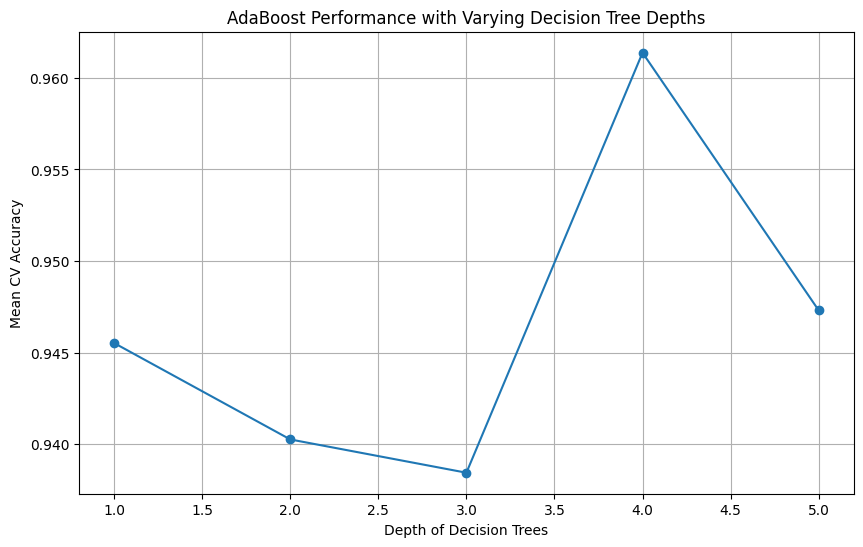

In [ ]:
# Range of depths for the decision trees
depths = range(1, 6)
mean_accuracies = []

for depth in depths:
    # Set the base learner
    tree = DecisionTreeClassifier(max_depth=depth, random_state=101)

    # Create the AdaBoost classifier
    ada_clf = AdaBoostClassifier(base_estimator=tree, n_estimators=10, learning_rate=1, random_state=101)

    # Perform 10-fold cross-validation
    scores = cross_val_score(ada_clf, X, y, cv=10)
    mean_accuracy = scores.mean()
    mean_accuracies.append(mean_accuracy)
    print(f"Depth {depth}: Mean CV Accuracy = {mean_accuracy}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(depths, mean_accuracies, marker='o')
plt.title('AdaBoost Performance with Varying Decision Tree Depths')
plt.xlabel('Depth of Decision Trees')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()